## Calculating Risk of a stock

Risk (Price Volatilities) - Standard Deviation

In [4]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
from datetime import datetime
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [12]:
start = datetime(2018, 1, 1)
end   = datetime.today()
print('Date: ',end)

Date:  2020-08-24 14:20:09.678397


In [14]:
dmart = web.DataReader('DMART.NS',data_source = 'yahoo',start = start,end = end)

In [15]:
dmart.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-01,1193.250000,1166.000000,1188.300049,1170.500000,334392.0,1170.500000
2018-01-02,1178.199951,1155.599976,1173.699951,1160.000000,302709.0,1160.000000
2018-01-03,1204.400024,1160.000000,1162.699951,1184.550049,580610.0,1184.550049
2018-01-04,1215.000000,1186.000000,1187.849976,1203.099976,707905.0,1203.099976
2018-01-05,1268.000000,1208.550049,1210.099976,1243.400024,1244328.0,1243.400024


In [22]:
dmart_close = dmart['Adj Close']
dmart_close.head()

Date
2018-01-01    1170.500000
2018-01-02    1160.000000
2018-01-03    1184.550049
2018-01-04    1203.099976
2018-01-05    1243.400024
Name: Adj Close, dtype: float64

In [23]:
daily_returns = dmart_close.pct_change()
daily_returns.head()

Date
2018-01-01         NaN
2018-01-02   -0.008971
2018-01-03    0.021164
2018-01-04    0.015660
2018-01-05    0.033497
Name: Adj Close, dtype: float64

In [28]:
risk = daily_returns.std()
risk

0.022403694601317848

In [39]:
print(str(round(risk,6)*100) + '%')

2.2404%


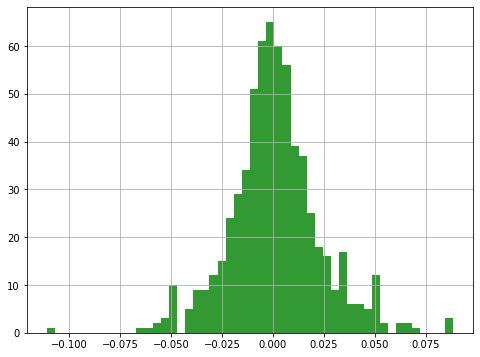

In [43]:
daily_returns.hist(bins = 50, alpha=0.8, color='g', figsize=(8,6));

In [45]:
assets = ['DMART.NS', 'RELIANCE.NS', 'SUNFLAG.NS']

df = pd.DataFrame()

for stock in assets:
    df[stock] = web.DataReader(stock, data_source = 'yahoo', start=start, end=end)['Adj Close']

df.head()

,DMART.NS,RELIANCE.NS,SUNFLAG.NS
Date,,,
2018-01-01,1170.500000,895.929260,79.519279
2018-01-02,1160.000000,897.308044,78.837967
2018-01-03,1184.550049,900.902649,80.443932
2018-01-04,1203.099976,906.319092,81.855217
2018-01-05,1243.400024,909.224243,80.979248


In [46]:
asset_daily_returns = df.pct_change()
asset_daily_returns.head()

,DMART.NS,RELIANCE.NS,SUNFLAG.NS
Date,,,
2018-01-01,NaN,NaN,NaN
2018-01-02,-0.008971,0.001539,-0.008568
2018-01-03,0.021164,0.004006,0.020370
2018-01-04,0.015660,0.006012,0.017544
2018-01-05,0.033497,0.003205,-0.010701


In [47]:
asset_risk = asset_daily_returns.std()
asset_risk

DMART.NS       0.022404
RELIANCE.NS    0.022374
SUNFLAG.NS     0.036225
dtype: float64

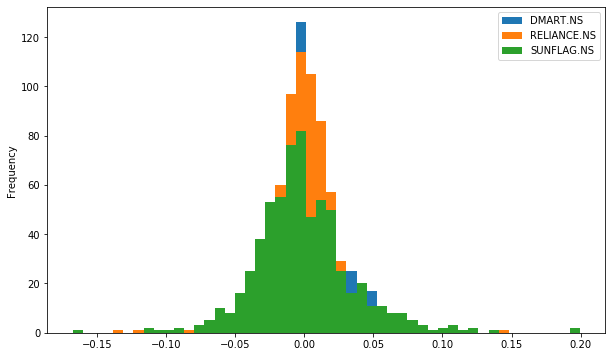

In [50]:
asset_daily_returns.plot.hist(bins=50, figsize = (10,6));

In [51]:
asset_risk.max()

0.036224744331727336

In [52]:
asset_risk.min()

0.022373525674237834